## Importações básicas de bibliotecas

In [5]:
#%matplotlib widget  
import pandas as pd # trabalhar com planilhas
import numpy as np # biblioteca numérica
import matplotlib.pyplot as mp # biblioteca gráfica
from datetime import datetime


In [6]:
# entradas: c_tau e M, probabilidade de selecionar um não infectado = (1-exp(c_tau[1]*t+c_tau[0]))
def distr(c_tau,M): 
  ultimo = -c_tau[0]/c_tau[1] # the city will be infected till this day
  t = np.arange(0,ultimo) # memory for days
  p_t = (1-np.exp(c_tau[1]*t+c_tau[0]))**M # probability of select M's unifecteds 
  np.append(p_t,1)
  p_dia = np.zeros(p_t.shape)
  aux=1
  for k in range(0,p_t.size):
    p_dia[k]=aux*(1-p_t[k])
    aux = aux*p_t[k]

  return p_dia

In [7]:
# in epidemiological terms: basic reproduction number, recovery rate, one infected per N initial inhabitants
def distr0(R0,ga,N,M): 
    ultimo = np.log(N)/(ga*(R0-1)) # the city will be infected till this day
    t = np.arange(1,ultimo) # memory for days
    p_t = (1-np.exp(ga*(R0-1)*t)/N)**M # probability of select M's unifecteds 
    np.append(p_t,1)
    p_dia = np.zeros(p_t.shape)
    aux=1
    for k in range(0,p_t.size):
        p_dia[k]=aux*(1-p_t[k])
        aux = aux*p_t[k]
    #display(p_dia.sum())
    return p_dia

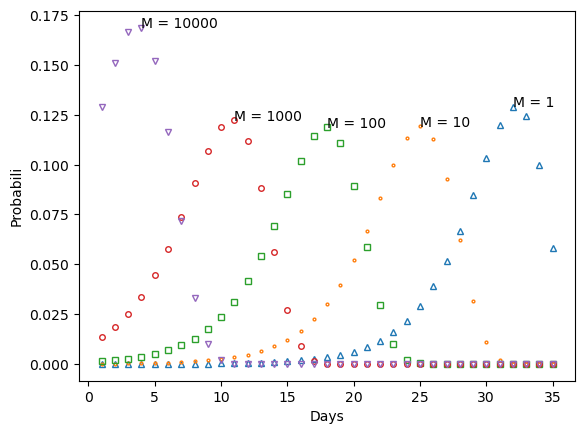

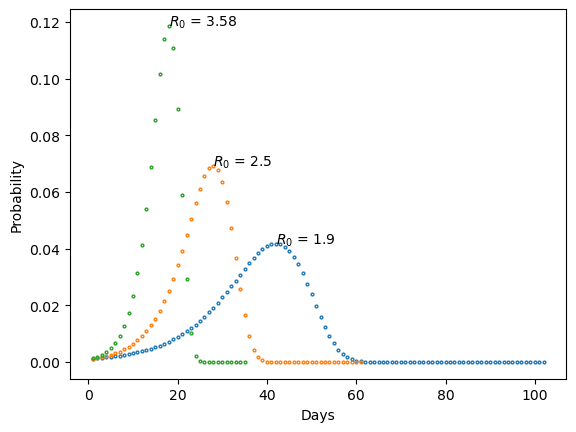

In [9]:

ate = 100
R0=[1.9 , 2.5, 3.58]
ga = 1/8
Mc = [1,10, 100, 1000, 10000]
mark = ['^','.','s','o','v'] 
Ni = 100000 # one infected for one hundred thousand
fig, ax1 = mp.subplots()

for k in range(0,len(Mc)):
    p_dias = distr0(R0[2],ga,Ni,Mc[k]) #  Probability mass function
    x = np.arange(1,p_dias.size+1)
    ax1.plot(x, p_dias,mark[k], markersize=4,fillstyle='none')
    aux= np.where(p_dias==p_dias.max())[0]+1
    ax1.text(aux,p_dias.max(),'M = '+str(Mc[k]))
    ax1.set_xlabel('Days')
    ax1.set_ylabel('Probability')
    
ultimo = np.log(Ni)/np.log(R0[0])
t = np.arange(0,ultimo)
ex = R0[0]**t/Ni

fig2, ax2 = mp.subplots()
for k in range(0,len(R0)):
    p_dias = distr0(R0[k],ga,Ni,100) # Probability mass function 
    x = np.arange(1,p_dias.size+1)
    ax2.plot(x,p_dias,'.', markersize=4,fillstyle='none')
    aux= np.where(p_dias==p_dias.max())[0]+1
    ax2.text(aux,p_dias.max(),'$R_0$ = '+str(R0[k]))
    ax2.set_xlabel('Days')
    ax2.set_ylabel('Probability')




In [16]:
fig.savefig('figura1.eps',format='eps')
fig2.savefig('figure2.eps')